# Global Trend Analysis - Gapminder

Importing all libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Q1.	Load the dataset and display the first few rows. How many countries does the dataset have?
- Data is having 142 nos countries in it

In [ ]:
df= pd.read_csv(r'E:\AKASH\Newton School DS 03.08.2023\Lectures\Python\Project- EDA\EDA1 Project\gapminder_full.csv')

In [ ]:
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [ ]:
total_countries= df['country'].nunique()
print('Total no of countries in dataset are:', total_countries)

Total no of countries in dataset are: 142


In [ ]:
df.shape

(1704, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [ ]:
# as year column format is int64, we will convert it to datetime
df['year'] = pd.to_datetime(df['year'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   country     1704 non-null   object        
 1   year        1704 non-null   datetime64[ns]
 2   population  1704 non-null   int64         
 3   continent   1704 non-null   object        
 4   life_exp    1704 non-null   float64       
 5   gdp_cap     1704 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 80.0+ KB


# Dataset : Gapminder

# Description:
This dataset contains statistical information about various countries, including population, life expectancy, GDP per capita, and continent.



### Columns:

#### 1.country: Name of the country.  
        Data Type: String  
        Range/Format: Text  
        Additional Notes: Name of the country.
#### 2.year: Year of the data record.  
        Data Type: Datetime  
        Range/Format: YYYY (e.g., 1952)  
        Additional Notes: Year of the data record.  
#### 3.population: Population of the country for the given year.  
        Data Type: Integer  
        Range/Format: Positive integer  
        Additional Notes: Total population of the country for the given year.
#### 4.continent: Continent where the country is located.  
        Data Type: String  
        Range/Format: Text  
        Additional Notes: Continent where the country is located.       
#### 5.life_exp: Life expectancy of the country's population for the given year.  
        Data Type: Float  
        Range/Format: Decimal number  
        Additional Notes: Life expectancy of the country's population for the given year.        
#### 6.gdp_cap: GDP per capita of the country for the given year.  
        Data Type: Float  
        Range/Format: Decimal number  
        Additional Notes: GDP per capita of the country for the given year.  



Q2. Create a pivot table that shows the average life expectancy for each continent and year. Index by 'continent', use 'year' as columns, and 'life_exp' as values.

In [ ]:
average_life_expectancy= df.pivot_table(index= 'continent', columns= 'year', values= 'life_exp', aggfunc= 'mean')
print(average_life_expectancy)

year            1952       1957       1962       1967       1972       1977  \
continent                                                                     
Africa     39.135500  41.266346  43.319442  45.334538  47.450942  49.580423   
Americas   53.279840  55.960280  58.398760  60.410920  62.394920  64.391560   
Asia       46.314394  49.318544  51.563223  54.663640  57.319269  59.610556   
Europe     64.408500  66.703067  68.539233  69.737600  70.775033  71.937767   
Oceania    69.255000  70.295000  71.085000  71.310000  71.910000  72.855000   

year            1982       1987       1992       1997       2002       2007  
continent                                                                    
Africa     51.592865  53.344788  53.629577  53.598269  53.325231  54.806038  
Americas   66.228840  68.090720  69.568360  71.150480  72.422040  73.608120  
Asia       62.617939  64.851182  66.537212  68.020515  69.233879  70.728485  
Europe     72.806400  73.642167  74.440100  75.505167  7

Q.3.Which countries had a GDP per capita higher than the 75th percentile in 2007?

In [ ]:
gdp_75th_percentile = df[df['year'] == 2007]['gdp_cap'].quantile(0.75)
high_gdp_countries = df[(df['year'] == 2007) & (df['gdp_cap'] > gdp_75th_percentile)]['country']
print(high_gdp_countries)

71             Australia
83               Austria
95               Bahrain
119              Belgium
251               Canada
407       Czech Republic
419              Denmark
527              Finland
539               France
575              Germany
599               Greece
671     Hong Kong, China
683              Hungary
695              Iceland
755              Ireland
767               Israel
779                Italy
803                Japan
851          Korea, Rep.
863               Kuwait
1091         Netherlands
1103         New Zealand
1151              Norway
1163                Oman
1247            Portugal
1259         Puerto Rico
1319        Saudi Arabia
1367           Singapore
1379     Slovak Republic
1391            Slovenia
1427               Spain
1475              Sweden
1487         Switzerland
1511              Taiwan
1607      United Kingdom
1619       United States
Name: country, dtype: object


Q.4.Categorize the 'life_exp' into 4 equally ranged bins from 'Low' to 'Very High'. Use cut to create these categorical life expectancy groups and add them as a new column 'Life_Exp_Range'.

In [ ]:
df['Life_Exp_Range'] = pd.cut(df['life_exp'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])
df.sample(10)

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range
135,Bolivia,1967,4040665,Americas,45.032,2586.886053,Medium
812,Jordan,1992,3867409,Asia,68.015,3431.593647,Very High
1338,Serbia,1982,9032824,Europe,70.162,15181.092700,Very High
504,Ethiopia,1952,20860941,Africa,34.078,362.146280,Low
467,Egypt,2007,80264543,Africa,71.338,5581.180998,Very High
349,Costa Rica,1957,1112300,Americas,60.026,2990.010802,High
325,"Congo, Dem. Rep.",1957,15577932,Africa,40.652,905.860230,Medium
1100,New Zealand,1992,3437674,Oceania,76.330,18363.324940,Very High
1069,Nepal,1957,9682338,Asia,37.686,597.936356,Low
1581,Turkey,1997,63047647,Europe,68.835,6601.429915,Very High


Q.5.Identify the top 5 countries with the highest GDP per capita in 2007. Use a horizontal bar chart to display this data.

            country      gdp_cap
1151         Norway  49357.19017
863          Kuwait  47306.98978
1367      Singapore  47143.17964
1619  United States  42951.65309
755         Ireland  40675.99635


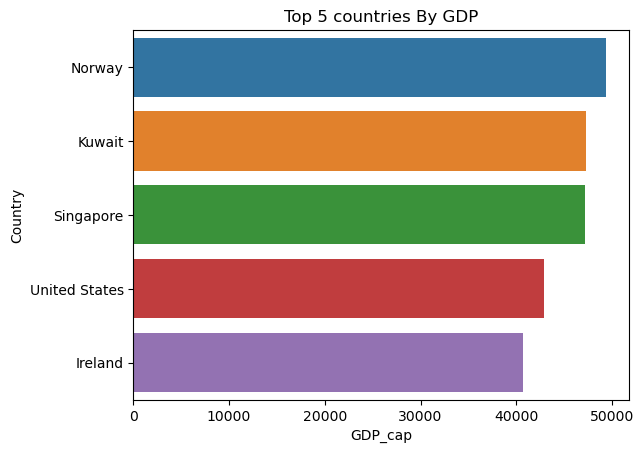

In [ ]:
top_gdp_2007 = df[df['year'] == 2007].nlargest(5, 'gdp_cap')
print(top_gdp_2007[['country', 'gdp_cap']])
sns.barplot(x= 'gdp_cap', y= 'country', data= top_gdp_2007, orient= 'h')
# plt.barh(top_gdp_2007['country'], top_gdp_2007['gdp_cap'])
plt.xlabel('GDP_cap')
plt.ylabel('Country')
plt.title('Top 5 countries By GDP')
plt.show()

Q6.	Find all country names that start with "I" and end with "a" using regex.

In [ ]:
import re

pattern = re.compile("^I.*a$")
ia_countries = df[df['country'].str.contains(pattern)]['country']
print(ia_countries)

696        India
697        India
698        India
699        India
700        India
701        India
702        India
703        India
704        India
705        India
706        India
707        India
708    Indonesia
709    Indonesia
710    Indonesia
711    Indonesia
712    Indonesia
713    Indonesia
714    Indonesia
715    Indonesia
716    Indonesia
717    Indonesia
718    Indonesia
719    Indonesia
Name: country, dtype: object


Q.7.	Create a boxplot using Seaborn to compare the distribution of GDP per capita for each continent in 2007

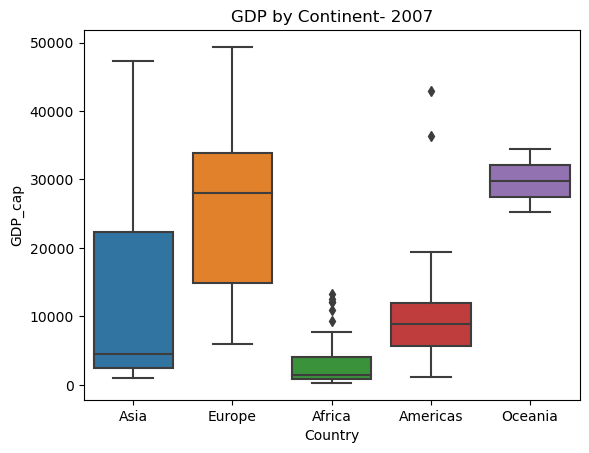

In [ ]:
sns.boxplot(x='continent', y='gdp_cap', data=df[df['year'] == 2007])
plt.ylabel('GDP_cap')
plt.xlabel('Country')
plt.title('GDP by Continent- 2007')
plt.show()

Q.8.	Find all countries with a life expectancy of over 80 years in 2007. List these countries and their respective continents.

In [ ]:
high_life_exp_2007 = df[(df['year'] == 2007) & (df['life_exp'] > 80)]
print(high_life_exp_2007[['country', 'continent']])


               country continent
71           Australia   Oceania
251             Canada  Americas
539             France    Europe
671   Hong Kong, China      Asia
695            Iceland    Europe
767             Israel      Asia
779              Italy    Europe
803              Japan      Asia
1103       New Zealand   Oceania
1151            Norway    Europe
1427             Spain    Europe
1475            Sweden    Europe
1487       Switzerland    Europe


Q.9.	Convert the 'year' column to a datetime type and extract the decade. Create a new column 'Decade' that groups the years into decades (e.g., the 1950s, 1960s).

In [ ]:
df['year'] = pd.to_datetime(df['year'], format='%Y')
df['Decade'] = (df['year'].dt.year // 10 * 10).astype(str) + 's'
print(df[['country', 'life_exp', 'Decade']].sample(10))

             country  life_exp Decade
1631         Uruguay    76.384  2000s
718        Indonesia    68.588  2000s
1213     Philippines    51.334  1950s
616           Guinea    38.842  1970s
1698        Zimbabwe    60.363  1980s
747          Ireland    71.080  1960s
1603  United Kingdom    75.007  1980s
563           Gambia    59.448  2000s
1485     Switzerland    79.370  1990s
386             Cuba    65.246  1960s


Q.10.	Compute the correlation matrix between GDP per capita, life expectancy, and population for the dataset. Then, use Seaborn to visualize this correlation matrix as a heatmap.

             gdp_cap  life_exp  population
gdp_cap     1.000000  0.583706   -0.025600
life_exp    0.583706  1.000000    0.064955
population -0.025600  0.064955    1.000000


<Axes: >

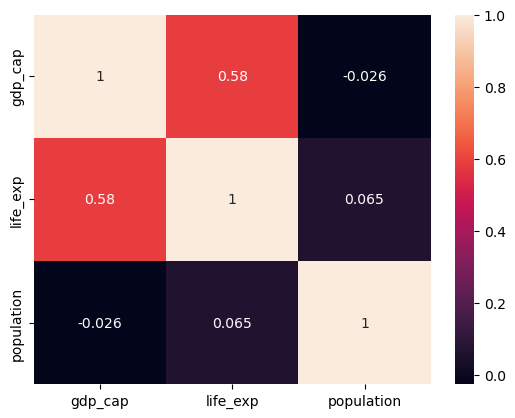

In [ ]:
correlation_matrix = df[['gdp_cap', 'life_exp', 'population']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True)

Q.11.	How has the global average life expectancy changed from 1952 to 2007? Plot a line graph to visualize this trend.
Subjective Question: Discuss the various reasons that could have contributed to the change.

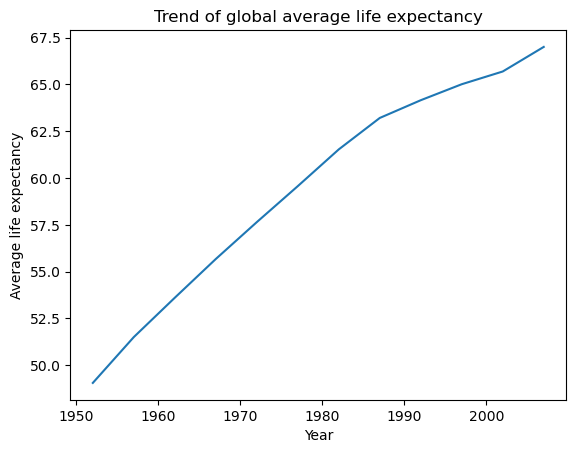

In [ ]:
GALE=df.pivot_table(index='year',values='life_exp',aggfunc='mean').reset_index() #created pivot table to find year wise average life expectancy
plt.figure()
plt.plot(GALE['year'],GALE['life_exp'])
plt.title('Trend of global average life expectancy')
plt.xlabel('Year')
plt.ylabel('Average life expectancy')
plt.show()

Subjective Question: Discuss the various reasons that could have contributed to the change.

The global average life expectancy has generally increased from 1952 to 2007. This increase can be attributed to several factors, including:

Improvements in healthcare: Advancements in medical treatments, vaccines, and access to healthcare facilities have played a significant role in increasing life expectancy worldwide.
Better nutrition: Improved food security, dietary diversity, and access to essential nutrients have contributed to better overall health and longer lifespans.
Improved sanitation and hygiene: Better access to clean water, improved sanitation facilities, and increased awareness of hygiene practices have helped reduce the spread of infectious diseases and improve overall health.
Economic development: Economic growth and increased income levels have enabled countries to invest more in healthcare infrastructure, education, and social welfare programs, which positively impact life expectancy.
Reduced child mortality: Improved child healthcare, vaccination programs, and better maternal care have contributed to lower child mortality rates, leading to increased life expectancy.
Advances in medical technology: Technological advancements in diagnostics, treatments, and medical equipment have enabled early detection and effective management of various diseases, prolonging life expectancy.
Public health initiatives: Governments and international organizations have implemented various public health programs and policies aimed at promoting health education, disease prevention, and access to healthcare services, contributing to improved life expectancy.
It's important to note that while the global average life expectancy has increased, there may be variations across different regions and countries due to factors such as poverty, conflicts, and access to resources.

Q.12.	For the year 2007, analyze the relationship between life expectancy and GDP per capita.
Subjective Question: Is there a noticeable trend or correlation? Represent this using a scatter plot

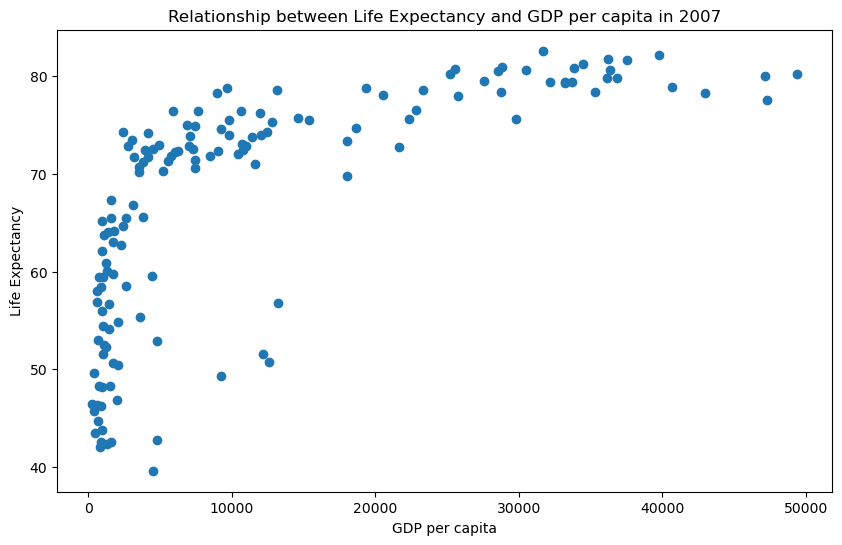

In [ ]:
# df_2007=df[df['year'].dt.year==2007].reset_index()
# filter_data=df_2007[['life_exp','gdp_cap']]
# correlation_matrix=filter_data.corr()
# correlation_matrix

# Filter the data for the year 2007
df_2007 = df[df['year'] == 2007]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_2007['gdp_cap'], df_2007['life_exp'])
plt.xlabel('GDP per capita')
plt.ylabel('Life Expectancy')
plt.title('Relationship between Life Expectancy and GDP per capita in 2007')
plt.show()


Subjective Question: Is there a noticeable trend or correlation? Represent this using a scatter plot.

From the scatter plot, we can observe a positive correlation between life expectancy and GDP per capita in 2007. Countries with higher GDP per capita tend to have higher life expectancy values, while countries with lower GDP per capita generally have lower life expectancy. This trend suggests that economic development and wealth play a crucial role in determining a country's overall health and longevity. Higher GDP per capita often translates to better access to healthcare, improved nutrition, better living conditions, and access to education, all of which contribute to increased life expectancy.

13Q] Compare the average GDP per capita for each continent in the year 2000. Use a bar chart for this comparison.

Q.13.	Compare the average GDP per capita for each continent in the year 2000. Use a bar chart for this comparison.
Subjective Question:  Why is the average GDP per capita for Oceania higher than the Americas even though the Americas have more countries?


In [ ]:
# Filter the data for the year 2000
data_2000 = data[data['year'] == 2000]

# Calculate the average GDP per capita for each continent
avg_gdp_continent = data_2000.groupby('continent')['gdp_cap'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_gdp_continent['continent'], avg_gdp_continent['gdp_cap'])
plt.xlabel('Continent')
plt.ylabel('Average GDP per capita')
plt.title('Average GDP per capita for each continent in 2000')
plt.xticks(rotation=45)
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 640x480 with 0 Axes>

Subjective Question: Why is the average GDP per capita for Oceania higher than the Americas even though the Americas have more countries? The average GDP per capita for Oceania is higher than the Americas in 2000, even though the Americas have more countries. This can be attributed to the following reasons:

Composition of countries: Oceania primarily consists of Australia and New Zealand, which are developed nations with high GDP per capita. On the other hand, the Americas include a diverse range of countries, including both developed and developing nations, resulting in a lower overall average GDP per capita.
Resource-based economies: Countries in Oceania, particularly Australia, have strong resource-based economies, such as mining and energy exports, which contribute significantly to their GDP.

Q.14.	Compare the life expectancy and GDP per capita of Afghanistan (a country known for its historical conflicts) and Switzerland (representing a peaceful and economically prosperous country) using the dataset provided.
-	Firstly, for the year 2007, use a bar chart to directly compare the life expectancy and GDP per capita between these two countries.



In [ ]:
# Filter the data for Afghanistan and Switzerland in 2007
data_2007 = data[(data['year'] == 2007) & (data['country'].isin(['Afghanistan', 'Switzerland']))]

# Create a bar chart
plt.figure(figsize=(10, 6))
data_2007 = data_2007.set_index('country')

data_2007['life_exp'].plot(kind='bar')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy in 2007')
plt.show()

plt.figure(figsize=(10, 6))
data_2007['gdp_cap'].plot(kind='bar')
plt.ylabel('GDP per capita')
plt.title('GDP per capita in 2007')
plt.show()

Then, create two separate line graphs to show the trends of these two metrics over all available years in the dataset for both countries. Subjective Question: What differences do you observe in terms of life expectancy and economic development? How might the stability or instability of a country influence these key metrics over time? Analyze the data through these visualizations and discuss your inferences.

In [ ]:
# Filter the data for Afghanistan and Switzerland
afghanistan = data[data['country'] == 'Afghanistan']
switzerland = data[data['country'] == 'Switzerland']

# Create line graphs for life expectancy
plt.figure(figsize=(10, 6))
plt.plot(afghanistan['year'], afghanistan['life_exp'], label='Afghanistan')
plt.plot(switzerland['year'], switzerland['life_exp'], label='Switzerland')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Trend')
plt.legend()
plt.show()

# Create line graphs for GDP per capita
plt.figure(figsize=(10, 6))
plt.plot(afghanistan['year'], afghanistan['gdp_cap'], label='Afghanistan')
plt.plot(switzerland['year'], switzerland['gdp_cap'], label='Switzerland')
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.title('GDP per capita Trend')
plt.legend()
plt.show()

Subjective Question: What differences do you observe in terms of life expectancy and economic development? How might the stability or instability of a country influence these key metrics over time? Analyze the data through these visualizations and discuss your inferences.

From the visualizations, we can observe significant differences between Afghanistan and Switzerland in terms of life expectancy and economic development (GDP per capita):

Life expectancy:

Switzerland has consistently maintained a higher life expectancy compared to Afghanistan throughout the period covered in the dataset. Afghanistan's life expectancy has remained relatively low, showing only a gradual increase over time. This disparity in life expectancy can be attributed to factors such as access to healthcare, nutrition, sanitation, and overall living standards, which tend to be better in stable and economically prosperous countries like Switzerland.

GDP per capita:

Switzerland has enjoyed a significantly higher GDP per capita compared to Afghanistan, reflecting its advanced economy and high living standards. Afghanistan's GDP per capita has remained relatively low, indicating economic challenges and limited resources. The gap in GDP per capita between the two countries has been widening over time, suggesting that Switzerland's economic prosperity has continued to grow, while Afghanistan has faced persistent economic difficulties.

The stability or instability of a country can greatly influence these key metrics over time:

Stable countries like Switzerland benefit from consistent economic policies, political stability, and a secure environment, fostering sustained economic growth and investment in public health and social welfare systems. This contributes to higher life expectancy and GDP per capita.
Instability, conflicts, and political turmoil, as experienced by Afghanistan, can disrupt economic activities, infrastructure development, and access to essential services like healthcare and education. This can lead to stagnation or decline in life expectancy and economic development.
Stable countries often have well-established institutions, effective governance, and a strong rule of law, which attract foreign investment and promote economic growth, further enhancing living standards and life expectancy.
Instability can also lead to brain drain, as skilled professionals and intellectuals may leave the country, hampering long-term development and progress.